### Problem 01 - Books
Prepare rules for the all the data sets 
1) Try different values of support and confidence. Observe the change in number of rules for different support,confidence values
2) Change the minimum length in apriori algorithm
3) Visulize the obtained rules using different plots 


#### 1. Importing necessary libraries

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import sklearn.metrics
from mlxtend.frequent_patterns import apriori,association_rules

#### 2. Importing the data

In [4]:
data_1 = pd.read_csv('book.csv')
data_1

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
0,0,1,0,1,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,1,0,1,0,0,0,0
4,0,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1995,0,0,1,0,0,1,1,1,0,1,1
1996,0,0,0,0,0,0,0,0,0,0,0
1997,0,0,0,0,0,0,0,0,0,0,0
1998,0,0,1,0,0,0,0,0,0,0,0


#### 3. Data Understanding

In [5]:
data_1.dtypes

ChildBks     int64
YouthBks     int64
CookBks      int64
DoItYBks     int64
RefBks       int64
ArtBks       int64
GeogBks      int64
ItalCook     int64
ItalAtlas    int64
ItalArt      int64
Florence     int64
dtype: object

In [6]:
data_1.shape

(2000, 11)

In [8]:
data_1.isnull().sum()

ChildBks     0
YouthBks     0
CookBks      0
DoItYBks     0
RefBks       0
ArtBks       0
GeogBks      0
ItalCook     0
ItalAtlas    0
ItalArt      0
Florence     0
dtype: int64

In [43]:
data_1.describe()

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
count,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,0.423000,0.247500,0.43100,0.282000,0.214500,0.241000,0.276000,0.113500,0.037000,0.048500,0.108500
std,0.494159,0.431668,0.49534,0.450086,0.410578,0.427797,0.447129,0.317282,0.188809,0.214874,0.311089
min,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.00000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### 4. Data Preparation

#### 5. Model Building

In [95]:
confidence = [0.1,0.2,0.4,0.6,0.8,1]

In [96]:
freq_item_set = {}
def gen_rules(df,confidence,support):
    for i in confidence:
        freq_item_set_i =apriori(data_1,support,True)
        best_associates= association_rules(freq_item_set_i,min_threshold=i)
        freq_item_set[i] = len(best_associates.antecedents)
    return pd.Series(freq_item_set).to_frame("Support: %s"%support)

In [97]:
confs = []

In [98]:
for i in [0.001,0.005,0.01,0.05,0.1,0.2]:
    freq_item_set_i = gen_rules(freq_item_set,confidence=confidence,support=i)
    confs.append(freq_item_set_i)

In [99]:
all_conf = pd.concat(confs,axis=1)

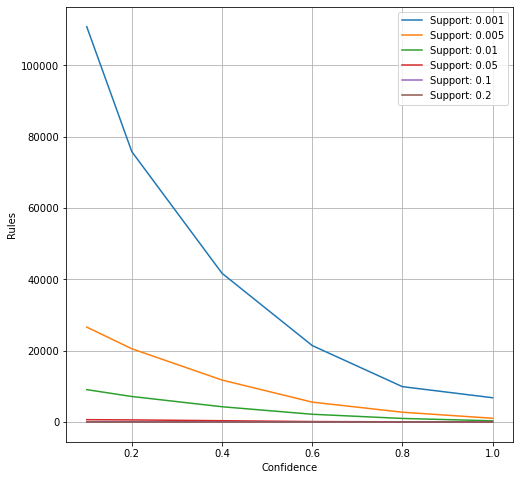

In [100]:
all_conf.plot(figsize=(8,8),grid=True)
plt.ylabel('Rules')
plt.xlabel('Confidence')
plt.show()

#### Final

In [101]:
freq_item_set = apriori(df = data_1,min_support=0.02,use_colnames=True)
freq_item_set

,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)
...,...,...
271,0.0210,"(CookBks, RefBks, DoItYBks, ArtBks, YouthBks, ..."
272,0.0270,"(CookBks, RefBks, DoItYBks, GeogBks, YouthBks,..."
273,0.0310,"(CookBks, DoItYBks, GeogBks, ArtBks, YouthBks,..."
274,0.0225,"(CookBks, RefBks, GeogBks, ArtBks, YouthBks, C..."


In [102]:
best_associates = association_rules(df = freq_item_set ,metric='confidence', min_threshold=1)
best_associates

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(ItalCook),(CookBks),0.1135,0.4310,0.1135,1.0,2.320186,0.064582,inf
1,(ItalAtlas),(RefBks),0.0370,0.2145,0.0370,1.0,4.662005,0.029063,inf
2,(ItalArt),(ArtBks),0.0485,0.2410,0.0485,1.0,4.149378,0.036812,inf
3,"(ChildBks, ItalCook)",(CookBks),0.0850,0.4310,0.0850,1.0,2.320186,0.048365,inf
4,"(ItalAtlas, ChildBks)",(RefBks),0.0285,0.2145,0.0285,1.0,4.662005,0.022387,inf
...,...,...,...,...,...,...,...,...,...
77,"(ArtBks, ItalArt, DoItYBks, ItalCook)",(CookBks),0.0250,0.4310,0.0250,1.0,2.320186,0.014225,inf
78,"(ItalArt, DoItYBks, ItalCook)","(CookBks, ArtBks)",0.0250,0.1670,0.0250,1.0,5.988024,0.020825,inf
79,"(GeogBks, CookBks, ItalArt, ItalCook)",(ArtBks),0.0240,0.2410,0.0240,1.0,4.149378,0.018216,inf
80,"(GeogBks, ArtBks, ItalArt, ItalCook)",(CookBks),0.0240,0.4310,0.0240,1.0,2.320186,0.013656,inf


### The End